<a href="https://colab.research.google.com/github/kang-min-suh/Big_Data_ML/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0%EC%8B%A4%EA%B8%B0_%EC%9D%B8%ED%94%84%EB%9F%B0_%EC%9E%91%EC%97%85%ED%98%952_%EB%AA%A8%EB%8D%B8%EB%A7%81_%EB%B0%8F_%ED%8F%89%EA%B0%80(%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 : data_regression.zip (수업노트에서 다운로드)
- train.csv, test.csv만 사용
- y_test.csv파일은 최종 평가용임

## 머신러닝
- 문제정의, 라이브러리/데이터 불러오기
- 탐색적 데이터 분석 (EDA)
- 데이터 전처리
- 피처엔지니어링
- (Train/Validation 나누기)
- 모델 선택/훈련/평가/최적화
- 예측
- (csv 생성)

## 문제정의, 라이브러리/데이터 불러오기
- 보험료 예측
- 평가: rmse
- csv: id와 예측 값

In [ ]:
# 라이브러리 및 데이터 불러오기
# import pandas as pd
# train = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/insurance/train.csv")
# test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/insurance/test.csv")
# # train = pd.read_csv("train.csv")
# # test = pd.read_csv("test.csv")

import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

In [ ]:
# 데이터 크기 확인
# train.shape, test.shape

train.shape, test.shape

((1070, 8), (268, 7))

In [ ]:
# 데이터 샘플 확인 (train)
# train.head(3)
train.head(3)

,id,age,sex,bmi,children,smoker,region,charges
0,330,61,female,36.385,1,yes,northeast,48517.56315
1,748,47,female,36.000,1,no,southwest,8556.90700
2,684,33,female,18.500,1,no,southwest,4766.02200


In [ ]:
# 데이터 샘플 확인 (test)
# test.head()
test.head()

,id,age,sex,bmi,children,smoker,region
0,508,24,female,25.270,0,no,northeast
1,1309,41,male,32.200,2,no,southwest
2,766,47,male,32.300,1,no,southwest
3,667,40,female,32.775,2,yes,northwest
4,1057,45,female,31.790,0,no,southeast


In [ ]:
# 결측치 확인 (train)
# train.isnull().sum()

train.isnull().sum()

,0
id,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# 결측치 확인 (test)
# test.isnull().sum()
test.isnull().sum()

,0
id,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0


In [ ]:
# 통계값 확인
# train.describe()

train.describe()

,id,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,671.090654,39.024299,30.730495,1.090654,13193.634800
std,380.666780,13.916945,6.053260,1.204997,12211.531632
min,0.000000,18.000000,16.815000,0.000000,1121.873900
25%,347.250000,27.000000,26.400000,0.000000,4695.398638
50%,673.000000,39.000000,30.400000,1.000000,9273.638800
75%,990.250000,51.000000,34.800000,2.000000,15826.112723
max,1337.000000,64.000000,52.580000,5.000000,63770.428010


In [ ]:
# 통계값 object (train)
# train.describe(include=object)

train.describe(include = 'object')

,sex,smoker,region
count,1070,1070,1070
unique,2,2,4
top,male,no,southeast
freq,544,856,287


In [ ]:
# 통계값 object (test)
# test.describe(include=object)
test.describe(include = 'object')

,sex,smoker,region
count,268,268,268
unique,2,2,4
top,female,no,southeast
freq,136,208,77


## 데이터 전처리 및 피처 엔지니어링

In [ ]:
# 데이터 샘플
# train.head(1)
train.head(1)

,id,age,sex,bmi,children,smoker,region,charges
0,330,61,female,36.385,1,yes,northeast,48517.56315


In [ ]:
# object 컬럼명 선택
# cols = train.select_dtypes(include="object").columns # 컬럼명을 원할 때는 마지막에 .columns를 넣어주어야 함.
# cols

cols = train.select_dtypes(include = 'object').columns
cols # object 타입의 데이터가 들어가게 됨.

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
# 원핫 인코딩
# train = pd.get_dummies(train, columns=cols)
# test = pd.get_dummies(test, columns=cols)
# display(train.head(2))
# display(test.head(2))

train = pd.get_dummies(train, columns = cols)
test = pd.get_dummies(test, columns = cols)
display(train.head(2))
display(test.head(2))

,id,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,330,61,36.385,1,48517.56315,True,False,False,True,True,False,False,False
1,748,47,36.000,1,8556.90700,True,False,True,False,False,False,False,True


,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,508,24,25.27,0,True,False,True,False,True,False,False,False
1,1309,41,32.20,2,False,True,True,False,False,False,False,True


In [ ]:
# pd.get_dummies(train, columns = cols)

In [ ]:
# 스케일링
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# cols = ['age', 'bmi']
# train[cols] = scaler.fit_transform(train[cols])
# test[cols] = scaler.transform(test[cols])
# train.head()
# test.head()
 # train데이터에서는 fit_transform을 하고, test데이터에서는 transform만 한다.☆☆☆☆☆☆

In [ ]:
# 스케일링
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# cols = ['bmi']
# train[cols] = scaler.fit_transform(train[cols])
# test[cols] = scaler.transform(test[cols])
# train.head()



In [ ]:
import numpy as np
train['charges'] = np.log1p(train['charges'])

<Axes: >

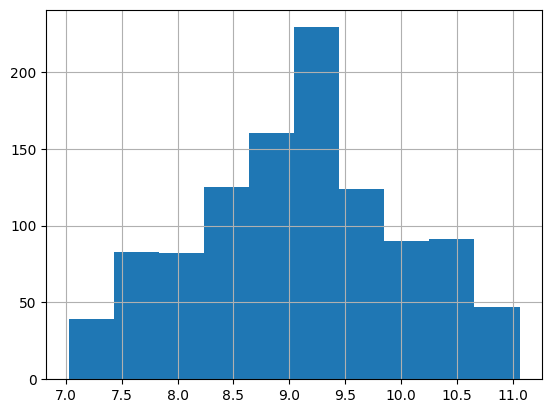

In [ ]:
train['charges'].hist()

In [ ]:
import numpy as np
train['charges'] = np.log1p(train['charges'])

<Axes: >

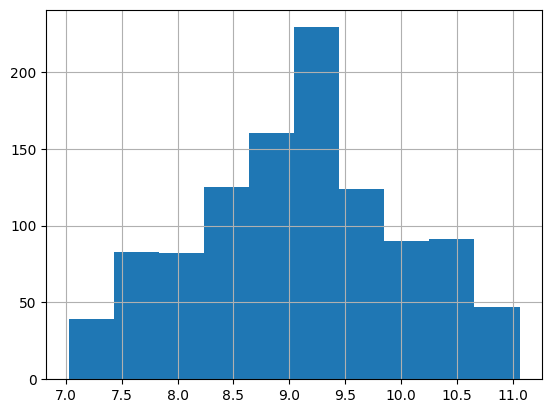

In [ ]:
train['charges'].hist()

## 검증 데이터 분리

<Axes: >

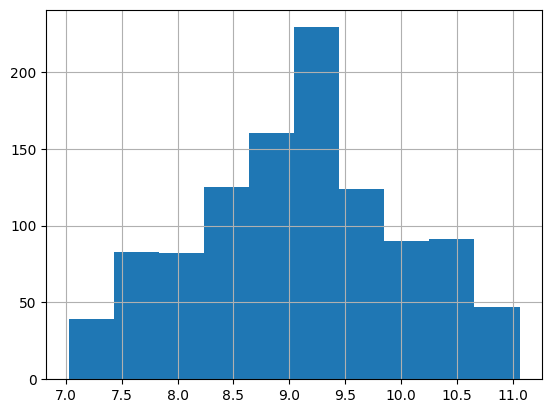

In [ ]:
train['charges'].hist()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split(train.drop('charges',axis=1),
#                                             train['charges'],
#                                             test_size=0.15,
#                                             random_state = 2022)
# X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train.drop('charges', axis = 1),
                                            train['charges'], # y 데이터
                                            test_size = 0.15,
                                            random_state = 2022)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((909, 12), (161, 12), (909,), (161,))

In [ ]:
X_tr.head(1)

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1009,41,31,0.554033,2,True,False,True,False,False,False,True,False


In [ ]:
y_tr.head(1)

,charges
1009,8.507296


In [ ]:
X_tr.head(1)

,id,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1009,41,31,0.554033,2,True,False,True,False,False,False,True,False


In [ ]:
y_tr.head(1)

,charges
1009,8.507296


In [ ]:
# 평가 수식
# from sklearn.metrics import mean_squared_error
# import numpy as np
# # np.sqrt(16)
# def rmse(y_test, pred):
#     return np.sqrt(mean_squared_error(y_test, pred))

from sklearn.metrics import mean_squared_error  # rmse는 넘파이 활용해야 함.
import numpy as np
def rmse(y_tes, pred):
    return np.sqrt(mean_squared_error(y_tes, pred))

In [ ]:
#LineaRegression  <--- 수업들으면서 한 거
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
rmse(np.exp(y_val), np.exp(pred))

#5888.05802236533 베이스라인

8258.279096897615

In [ ]:
# LinearRegression  <--- 강사님 버전
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
rmse(np.exp(y_val), np.exp(pred))

# 5888.058022365329 베이스라인

8258.279096897615

In [ ]:
# RandomForestRegressor
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X_tr, y_tr)
# pred = model.predict(X_val)
#rmse(np.exp(y_val), np.exp(pred))
# 4691.498598226366 베이스라인
# 4722.06683465538 스탠다드스켈러
# 4705.862619729388 민맥스 스켈러
# 4627.730520367604 log

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_tr,y_tr)
pred = model.predict(X_val)
rmse(np.exp(y_val), np.exp(pred))

# 4692.34701331671 베이스 라인  # 값이 커지면 에러값이 커지는 것.
# 4786.464495330731 민맥스 스켈러로 했을 때
# 로그를 씌워서 한게 효과가 있다...

4626.885838731

In [ ]:
# xgboost Regressor
# from xgboost import XGBRegressor
# model = XGBRegressor(objective='reg:squarederror')
# model.fit(X_tr, y_tr)
# pred = model.predict(X_val)
# rmse(np.exp(y_val), np.exp(pred))

# from xgboost import XGBRegressor
# model = XGBRegressor(objective = 'reg:squarederror')
# model.fit(X_tr, y_tr)
# pred = model.predict(X_val)
# rmse(np.exp(y_val), np.exp(pred))

5992.955080162773

In [ ]:
# test 데이터 예측
pred = model.predict(test)

In [ ]:
# 제출용 데이터 프레임
# submit = pd.DataFrame(
#             {
#                 'id':test['id'],
#                 'charges':np.exp(pred)
#             }
#         )

submit = pd.DataFrame(
            {
                'id': test['id'],
                'charges': np.exp(pred) # np.exp로 해야 단위가 맞춰짐.np.exp 안하면 굉장히 작은 값으로 나옴.
            }
        )

In [ ]:
submit.to_csv('1111.csv', index = False)

In [ ]:
# csv파일 생성
# submit.to_csv("1111.csv", index=False)

## 평가
- 수험자는 알 수 없는 영역
- 영상에는 np.exp()가 빠져있습니다. np.exp(pred)가 정확한 코드입니다.

In [ ]:
# y_test = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/main/p2/insurance/y_test.csv")
# # y_test = pd.read_csv("y_test.csv")
# rmse(y_test['charges'], np.exp(pred))

y_test = pd.read_csv('y_test.csv')
rmse(y_test['charges'], pred) # 성능이 떨어짐.

17909.67020579622